<a href="https://colab.research.google.com/github/sunjin7725/Deep_Lotto/blob/master/Lotto_regression_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 34kB/s 
     |████████████████████████████████| 4.3MB 39.8MB/s 
     |████████████████████████████████| 501kB 49.1MB/s 


In [12]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import numpy as np

In [14]:
rows = np.loadtxt('/gdrive/My Drive/Colab Notebooks/Deep_Lotto/2020-04-01_lotto_v904_data.csv',delimiter=",")
print(len(rows))

904


In [0]:
def number2onehot(number):
    one_hot = np.zeros(45)

    for i in range(6):
        one_hot[int(number[i])-1] = 1
        
    return one_hot

In [0]:
def onehot2number(onehot):
    number = []
    
    for i in range(len(onehot)):
        if onehot[i] == 1:
            number.append(i+1)
        
    return number

In [17]:
numbers = rows[:,1:7]
onehots = list(map(number2onehot,numbers))
x_samples = onehots[0:904-1]
y_samples = onehots[1:904]

#원핫인코딩으로 표시
print("ohbins")
print("X[0]: " + str(x_samples[0]))
print("Y[0]: " + str(y_samples[0]))

#번호로 표시
print("numbers")
print("X[0]: " + str(onehot2number(x_samples[0])))
print("Y[0]: " + str(onehot2number(y_samples[0])))

ohbins
X[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
Y[0]: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
numbers
X[0]: [10, 23, 29, 33, 37, 40]
Y[0]: [9, 13, 21, 25, 32, 42]


데이터 셋 구성

In [18]:
train_idx = (0,800)
val_idx = (800,850)
test_idx = (850, len(numbers))

print("train: {0}, val: {1}, test: {2}".format(train_idx, val_idx, test_idx))

train: (0, 800), val: (800, 850), test: (850, 904)


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [0]:
model = keras.Sequential([
                          keras.layers.LSTM(128, batch_input_shape=(1,1,45), return_sequences=False, stateful=True),
                          keras.layers.Dense(45,activation="sigmoid")
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
train_loss = []
train_acc = []
val_loss = []
val_acc = []

for epoch in range(100):
  model.reset_states()

  batch_train_loss = []
  batch_train_acc = []

  for i in range(train_idx[0],train_idx[1]):
    xs = x_samples[i].reshape(1,1,45)
    ys = y_samples[i].reshape(1,45)

    loss, acc = model.train_on_batch(xs,ys)

    batch_train_acc.append(acc)
    batch_train_loss.append(loss)

  train_acc.append(np.mean(batch_train_acc))
  train_loss.append(np.mean(batch_train_loss))

  batch_val_acc = []
  batch_val_loss = []

  for i in range(val_idx[0], val_idx[1]):
    xs = x_samples[i].reshape(1,1,45)
    ys = y_samples[i].reshape(1,45)

    loss, acc = model.test_on_batch(xs,ys)

    batch_val_acc.append(acc)
    batch_val_loss.append(loss)

  val_acc.append(np.mean(batch_val_acc))
  val_loss.append(np.mean(batch_val_loss))

  print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss), np.mean(batch_val_acc), np.mean(batch_val_loss)))

  model.save('model_{0:04d}.h5'.format(epoch+1))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
epoch    0 train acc 0.862 loss 0.409 val acc 0.867 loss 0.396
epoch    1 train acc 0.867 loss 0.396 val acc 0.867 loss 0.395
epoch    2 train acc 0.867 loss 0.394 val acc 0.867 loss 0.395
epoch    3 train acc 0.867 loss 0.392 val acc 0.867 loss 0.396
epoch    4 train acc 0.867 loss 0.388 val acc 0.867 loss 0.397
epoch    5 train acc 0.867 loss 0.384 val acc 0.867 loss 0.398
epoch    6 train acc 0.867 loss 0.380 val acc 0.867 loss 0.399
epoch    7 train acc 0.867 loss 0.375 val acc 0.867 loss 0.401
epoch    8 train acc 0.867 loss 0.369 val acc 0.866 loss 0.404
epoch    9 train acc 0.867 loss 0.364 val acc 0.866 loss 0.407
epoch   10 train acc 0.867 loss 0.358 val acc 0.865 loss 0.410
epoch   11 train acc 0.867 loss 0.352 val acc 0.864 loss 0.414
epoch   12 train acc 0.868 loss 0.345 val acc 0.864 loss 0.418
epoch   13 train acc 0.869 loss 0.338 val acc 0.863 loss 0.422
epoch   14 train acc 0.8

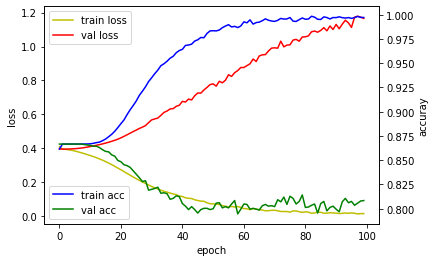

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

전체 데이터 학습 후 10개의 결과 추출해보기

In [24]:
train_loss = []
train_acc = []

for epoch in range(200):
  model.reset_states()

  batch_train_acc = []
  batch_train_loss = []

  for i in range(len(x_samples)):
    xs = x_samples[i].reshape(1,1,45)
    ys = y_samples[i].reshape(1,45)

    loss, acc = model.train_on_batch(xs, ys)

    batch_train_acc.append(acc)
    batch_train_loss.append(loss)

  train_acc.append(np.mean(batch_train_acc))
  train_loss.append(np.mean(batch_train_loss))

  if epoch % 10 == 0:
    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss)))

epoch    0 train acc 0.999 loss 0.003
epoch   10 train acc 1.000 loss 0.002
epoch   20 train acc 0.998 loss 0.005
epoch   30 train acc 1.000 loss 0.000
epoch   40 train acc 0.999 loss 0.004
epoch   50 train acc 1.000 loss 0.002
epoch   60 train acc 1.000 loss 0.001
epoch   70 train acc 0.999 loss 0.003
epoch   80 train acc 0.996 loss 0.013
epoch   90 train acc 0.998 loss 0.006
epoch  100 train acc 0.999 loss 0.003
epoch  110 train acc 0.999 loss 0.003
epoch  120 train acc 0.999 loss 0.003
epoch  130 train acc 0.999 loss 0.003
epoch  140 train acc 1.000 loss 0.001
epoch  150 train acc 1.000 loss 0.001
epoch  160 train acc 1.000 loss 0.000
epoch  170 train acc 1.000 loss 0.002
epoch  180 train acc 1.000 loss 0.000
epoch  190 train acc 0.998 loss 0.004


In [0]:
def gen_numbers_from_probability(nums_prob):

    ball_box = []

    for n in range(45):
        ball_count = int(nums_prob[n] * 100 + 1)
        ball = np.full((ball_count), n+1) #1부터 시작
        ball_box += list(ball)

    selected_balls = []

    while True:
        
        if len(selected_balls) == 6:
            break
        
        ball_index = np.random.randint(len(ball_box), size=1)[0]
        ball = ball_box[ball_index]

        if ball not in selected_balls:
            selected_balls.append(ball)

    return selected_balls

In [26]:
# 마지막 회차까지 학습한 모델로 다음 회차 추론

print('receive numbers')

xs = x_samples[-1].reshape(1, 1, 45)

ys_pred = model.predict_on_batch(xs)

list_numbers = []

for n in range(10):
    numbers = gen_numbers_from_probability(ys_pred[0])
    print('{0} : {1}'.format(n, numbers))
    list_numbers.append(numbers)  

receive numbers
0 : [40, 43, 19, 17, 28, 33]
1 : [33, 19, 17, 42, 40, 32]
2 : [43, 19, 32, 33, 45, 40]
3 : [33, 18, 32, 41, 43, 40]
4 : [33, 17, 40, 32, 43, 19]
5 : [33, 43, 17, 40, 45, 19]
6 : [19, 33, 32, 17, 43, 40]
7 : [32, 43, 33, 19, 17, 40]
8 : [17, 43, 32, 40, 33, 19]
9 : [17, 4, 32, 33, 43, 19]
